### METODE LOGISTIC REGRESION UNTUK MENETUKAN TINGKAT AKURASI PADA DATA DIABETES

Tentu! Berikut adalah penjelasan mengenai **Logistic Regression** yang mengikuti format yang sama dengan yang Anda berikan untuk KNN:

## Logistic Regression:
- **Algoritma Logistic Regression** digunakan untuk memodelkan probabilitas suatu kelas atau peristiwa, seperti kehadiran atau ketidakberadaan suatu fitur.
- Ini adalah algoritma pembelajaran mesin terbimbing yang digunakan untuk masalah klasifikasi, khususnya untuk klasifikasi biner.
- Logistic Regression mengubah output dari model regresi linier menjadi probabilitas dengan menggunakan fungsi sigmoid (fungsi logistik).
- Ini adalah algoritma pembelajaran parametrik, yang berarti bahwa ia berasumsi tentang distribusi data yang mendasarinya.

### Langkah-langkah: Algoritma Logistic Regression:
1. **Muat data.**
2. **Persiapkan data:** Lakukan praproses data, seperti pengkodean variabel kategorikal dan normalisasi fitur, jika diperlukan.
3. **Bagi data:** Pisahkan dataset menjadi data pelatihan dan data pengujian.
4. **Tentukan model:** Pilih model Logistic Regression dari pustaka yang relevan (misalnya, Scikit-Learn di Python).
5. **Latih model:** Gunakan data pelatihan untuk melatih model dengan meminimalkan fungsi kerugian log-likelihood.
6. **Prediksi:** Gunakan model terlatih untuk memprediksi probabilitas kelas untuk data pengujian.
7. **Tentukan klasifikasi:** Jika probabilitas di atas ambang batas (misalnya, 0,5), klasifikasikan sebagai kelas positif; jika tidak, klasifikasikan sebagai kelas negatif.
8. **Evaluasi model:** Hitung metrik kinerja seperti akurasi, presisi, recall, dan F1-score untuk mengevaluasi efektivitas model.

<!-- <img src = './Image/logistic_regression_image.png' width=30% height=20%/> -->

### Fungsi Sigmoid:
Fungsi sigmoid digunakan untuk mengubah output menjadi probabilitas yang berada dalam rentang [0, 1].

- Fungsi sigmoid diberikan oleh rumus:
  \[
  \sigma(z) = \frac{1}{1 + e^{-z}}
  \]
- Di mana \( z \) adalah kombinasi linier dari fitur input dan koefisien model.

### Interpretasi Koefisien:
Koefisien dalam Logistic Regression menunjukkan seberapa besar perubahan log-odds dari kelas positif untuk setiap unit perubahan pada fitur.

- 1. Koefisien positif menunjukkan peningkatan kemungkinan kelas positif ketika fitur meningkat.
- 2. Koefisien negatif menunjukkan penurunan kemungkinan kelas positif ketika fitur meningkat.



Berikut adalah ringkasan mengenai **Logistic Regression** dengan kelebihan dan kekurangan, mengikuti format yang sama seperti yang Anda berikan untuk KNN:

### Ringkasan:
#### Kelebihan:
- **Logistic Regression** adalah algoritma yang sederhana dan mudah diinterpretasikan, sehingga dapat memberikan wawasan yang jelas tentang pengaruh variabel independen terhadap variabel dependen.
- Ini merupakan algoritma yang cepat untuk dilatih dan diimplementasikan, sehingga efisien untuk dataset besar.
- Logistic Regression memberikan probabilitas yang dapat diinterpretasikan untuk klasifikasi, memungkinkan analisis lebih mendalam tentang keputusan model.
- Algoritma ini dapat dengan mudah ditingkatkan ke model yang lebih kompleks, seperti regresi multilogit untuk masalah klasifikasi multikelas.
- **Regularisasi** dapat diterapkan pada Logistic Regression untuk mencegah overfitting dan meningkatkan generalisasi model, dengan menggunakan metode seperti L1 (Lasso) atau L2 (Ridge).

#### Kekurangan:
- Logistic Regression hanya dapat digunakan untuk masalah klasifikasi biner (atau multikelas dengan perluasan) dan tidak cocok untuk masalah regresi.
- Asumsi linearitas antara fitur independen dan log-odds dari variabel dependen dapat menjadi batasan. Jika hubungan tidak linear, kinerja model dapat menurun.
- Sensitivitas terhadap outlier dapat memengaruhi akurasi model, terutama pada data yang memiliki banyak nilai ekstrem.
- Logistic Regression membutuhkan data yang terdistribusi dengan baik dan tidak terlalu banyak fitur untuk memastikan keakuratan prediksi.
- Ini mengasumsikan bahwa fitur independen tidak berkorelasi satu sama lain (multikolinearitas), yang dapat mempengaruhi stabilitas koefisien model.
- Penggunaan model ini pada data tidak seimbang dapat menyebabkan bias dalam prediksi, terutama jika kelas mayoritas mendominasi dataset.



In [4]:
import math
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel
from sklearn.preprocessing import MinMaxScaler


In [5]:
df = pd.read_csv("../Data/Diabetes.csv",)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns = ["grade1", "grade2", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "label"]

In [8]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   grade1                    768 non-null    int64  
 1   grade2                    768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   label                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   grade1  grade2  BloodPressure  SkinThickness  Insulin   BMI  \
0       6     148             72             35        0  33.6   
1       1      85             66             29        0  26.6   
2       8     183             64     

In [9]:
X = df[["grade1", "grade2"]]
X = np.array(X)


min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
X = min_max_scaler.fit_transform(X)


Y = df["label"] 
Y = np.array(Y)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [11]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)
print('Score (Scikit-learn):', clf.score(X_test, Y_test))

Score (Scikit-learn): 0.7362204724409449


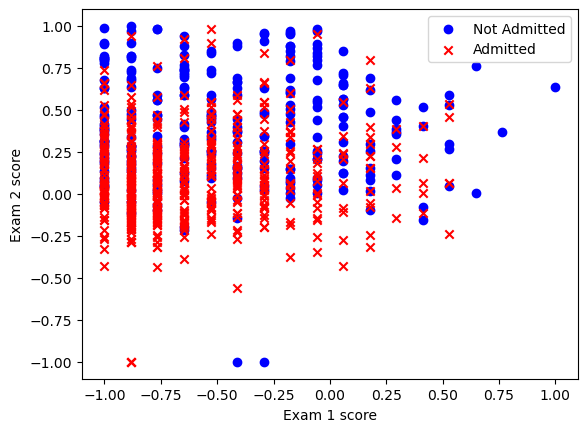

In [12]:
pos = where(Y == 1)
neg = where(Y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend(['Not Admitted', 'Admitted'])
show()


In [13]:
def Sigmoid(z):
    return 1 / (1 + math.exp(-z))

In [14]:
def Hypothesis(theta, x):
    z = np.dot(theta, x)
    return Sigmoid(z)

In [15]:
def Cost_Function(X, Y, theta, m):
    sumOfErrors = 0
    for i in range(m):
        xi = X[i]
        hi = Hypothesis(theta, xi)
        error = Y[i] * math.log(hi) if Y[i] == 1 else (1 - Y[i]) * math.log(1 - hi)
        sumOfErrors += error
    return -sumOfErrors / m

In [16]:
def Gradient_Descent(X, Y, theta, m, alpha):
    new_theta = theta.copy()
    for j in range(len(theta)):
        sumErrors = sum((Hypothesis(theta, X[i]) - Y[i]) * X[i][j] for i in range(m))
        new_theta[j] = theta[j] - (alpha / m) * sumErrors
    return new_theta

In [17]:
def Logistic_Regression(X, Y, alpha, theta, num_iters):
    m = len(Y)
    for _ in range(num_iters):
        theta = Gradient_Descent(X, Y, theta, m, alpha)
    return theta


In [18]:
def Declare_Winner(theta):
    score = 0
    scikit_score = clf.score(X_test, Y_test)
    length = len(X_test)
    for i in range(length):
        prediction = round(Hypothesis(theta, X_test[i]))
        answer = Y_test[i]
        if prediction == answer:
            score += 1
    my_score = score / length
    print('Your score:', my_score)
    print('Scikit-learn score:', scikit_score)
    if my_score > scikit_score:
        print('You won!')
    elif my_score == scikit_score:
        print('It\'s a tie!')
    else:
        print('Scikit-learn won..')

In [19]:
initial_theta = [0, 0]
alpha = 0.1
iterations = 1000

In [20]:
theta = Logistic_Regression(X, Y, alpha, initial_theta, iterations)
Declare_Winner(theta)

Your score: 0.7559055118110236
Scikit-learn score: 0.7362204724409449
You won!
